# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
df0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df1 = pd.read_csv('/datasets/geo_data_1.csv')

In [6]:
df1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [9]:
df2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### Вывод пропущеных данных нет

### Сравнение данных в таблицах

In [11]:
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [12]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [13]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


#### Вывод по место рождениям

1) df1 разброс данным между средней и медианной гораздо меньше, чем в df0 b df2

2) df1 меньше всего запасов, потому что max менньше других

3) df2 имеет больше всего запасов, мах самый большой

### Расмотрим распределение признаков в 3-х регионах

#### Распределение признаков df0

<AxesSubplot:>

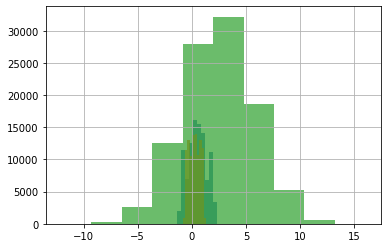

In [14]:
df0['f0'].hist(alpha=0.75 )
df0['f1'].hist(alpha=0.75 )
df0['f2'].hist(alpha=0.7 )

<AxesSubplot:>

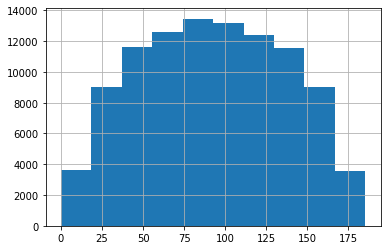

In [15]:
df0['product'].hist()

#### Распределение признаков df1

<AxesSubplot:>

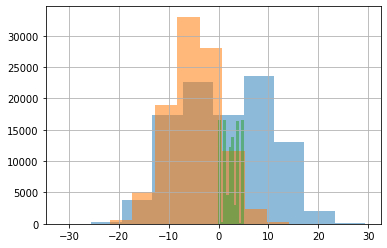

In [16]:
df1['f0'].hist(alpha=0.5 )
df1['f1'].hist(alpha=0.55 )
df1['f2'].hist(alpha=0.5 )

<AxesSubplot:>

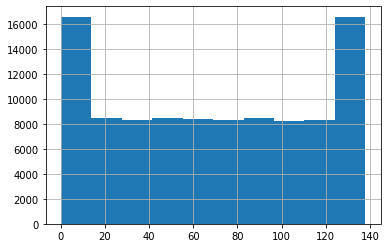

In [17]:
df1['product'].hist()

#### Распределение признаков df2

<AxesSubplot:>

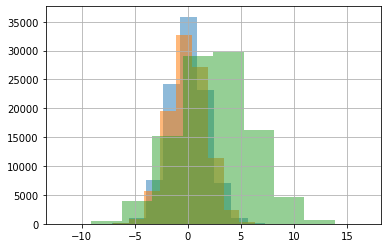

In [18]:
df2['f0'].hist(alpha=0.5 )
df2['f1'].hist(alpha=0.55 )
df2['f2'].hist(alpha=0.5 )

<AxesSubplot:>

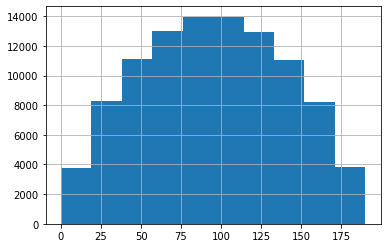

In [19]:
df2['product'].hist()

#### Вывод распределение признаков у df0и df2 немного похожи ,в отличие от df1 

## Обучение и проверка модели

In [20]:
df0_sort=df0
df1_sort=df1
df2_sort=df2

### Раздиляю на обучающию и валидную выборку

Разделяю выборки в df0

In [21]:
features0 = df0_sort[['f0','f1','f2']] # извлеките признаки 
target0 = df0_sort['product']  # извлеките целевой признак
features_train0, features_valid0, target_train0, target_valid0 = train_test_split(features0, target0, test_size=0.25, random_state=12345) # отделите 25% данных #для валидационной 


Разделяю выборки в df1

In [22]:
features1 = df1_sort[['f0','f1','f2']] # извлеките признаки 
target1 = df1_sort['product']  # извлеките целевой признак
features_train1, features_valid1, target_train1, target_valid1= train_test_split(features1, target1, test_size=0.25, random_state=12345) # отделите 25% данных #для валидационной 


Разделяю выборки в df2

In [23]:
features2 = df2_sort[['f0','f1','f2']] # извлеките признаки 
target2 = df2_sort['product']  # извлеките целевой признак
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(features2, target2, test_size=0.25, random_state=12345) # отделите 25% данных #для валидационной 


### Обучаю  модель  и анализирую RMSE и Средний запас предсказаного сырья

Для региона df0

In [24]:
model = LinearRegression()# инициализируйте модель LinearRegression
model.fit(features_train0,target_train0) # обучите модель на тренировочной выборке
predictions_valid0 = model.predict(features_valid0) # получите предсказания модели на валидационной выборке

result0=mean_squared_error(target_valid0, predictions_valid0)**0.5# посчитайте значение метрики rmse на валидационной выборке # посчитайте значение #метрики rmse на валидационной выборке # посчитайте значение метрики RMSE на валидационной выборке

best_modeld_f0 =model



df0_mean_reserve=predictions_valid0.mean()
print("RMSE модели линейной регрессии на валидационной выборке df0:", result0)
print("Средний запас предсказаного сырья df0:", predictions_valid0.mean(),'тыс.баралей')

RMSE модели линейной регрессии на валидационной выборке df0: 37.5794217150813
Средний запас предсказаного сырья df0: 92.59256778438035 тыс.баралей


Для региона df1

In [25]:
model.fit(features_train1,target_train1) # обучите модель на тренировочной выборке
predictions_valid1 = model.predict(features_valid1) # получите предсказания модели на валидационной выборке

result1=mean_squared_error(target_valid1, predictions_valid1)**0.5# посчитайте значение метрики rmse на валидационной выборке # посчитайте значение #метрики rmse на валидационной выборке # посчитайте значение метрики RMSE на валидационной выборке
best_modeld_f1 =model
df1_mean_reserve=predictions_valid1.mean()
print("RMSE модели линейной регрессии на валидационной выборке df1:", result1)
print("Средний запас предсказаного сырья df0:", predictions_valid1.mean(),'тыс.баралей')

RMSE модели линейной регрессии на валидационной выборке df1: 0.893099286775617
Средний запас предсказаного сырья df0: 68.728546895446 тыс.баралей


Для региона df2

In [26]:
model.fit(features_train2,target_train2) # обучите модель на тренировочной выборке
predictions_valid2 = model.predict(features_valid2) # получите предсказания модели на валидационной выборке

result2=mean_squared_error(target_valid2, predictions_valid2)**0.5# посчитайте значение метрики rmse на валидационной выборке # посчитайте значение #метрики rmse на валидационной выборке # посчитайте значение метрики RMSE на валидационной выборке
best_modeld_f2 =model
df2_mean_reserve=predictions_valid2.mean()
print("RMSE модели линейной регрессии на валидационной выборке df2:", result2)
print("Средний запас предсказаного сырья df2:", predictions_valid2.mean(),'тыс.баралей')

RMSE модели линейной регрессии на валидационной выборке df2: 40.02970873393434
Средний запас предсказаного сырья df2: 94.96504596800489 тыс.баралей


### Вывод  региоы 0 и 2 по многим показателям похожи
Похожи по следующим параметрам

1) RMSE 

2) Средний запас предсказаного сырья

3) Распределения параметров f0,f1,f2

## Подготовка к расчёту прибыли

### Ключевые значения для расчетов

### Сформирую таблицу в которой будут неоходимые значения для расчетов

Создам таблицы в которые буду записывать заначения

In [27]:
df0_predictions=pd.DataFrame()
df1_predictions=pd.DataFrame()
df2_predictions=pd.DataFrame()

Заполню значениями для 0 региона

In [28]:
df0_predictions['predictions']= pd.Series(predictions_valid0)
df0_predictions['product']=target_valid0
df0_predictions['product']=target_valid0.reset_index()['product']
df0_predictions

,predictions,product
0,95.894952,10.038645
1,77.572583,114.551489
2,77.892640,132.603635
3,90.175134,169.072125
4,70.510088,122.325180
...,...,...
24995,103.037104,170.116726
24996,85.403255,93.632175
24997,61.509833,127.352259
24998,118.180397,99.782700


Заполню значениями для 1 региона

In [29]:
df1_predictions['predictions']= pd.Series(predictions_valid1)
df1_predictions['product']=target_valid1
df1_predictions['product']=target_valid1.reset_index()['product']
df1_predictions

,predictions,product
0,82.663314,80.859783
1,54.431786,53.906522
2,29.748760,30.132364
3,53.552133,53.906522
4,1.243856,0.000000
...,...,...
24995,136.869211,137.945408
24996,110.693465,110.992147
24997,137.879341,137.945408
24998,83.761966,84.038886


Заполню значениями для 2 региона

In [30]:
df2_predictions['predictions']= pd.Series(predictions_valid2)
df2_predictions['product']=target_valid2
df2_predictions['product']=target_valid2.reset_index()['product']
df2_predictions

,predictions,product
0,93.599633,61.212375
1,75.105159,41.850118
2,90.066809,57.776581
3,105.162375,100.053761
4,115.303310,109.897122
...,...,...
24995,78.765887,28.492402
24996,95.603394,21.431303
24997,99.407281,125.487229
24998,77.779912,99.422903


### Рассчитаю достаточный объём сырья для безубыточной разработки новой скважины. Сравню полученный объём сырья со средним запасом в каждом регионе

In [31]:
good_materials=10**10/450000
print("Кол-во тыс.барелей нефти для самоукупаемости в регионе=",good_materials)

Кол-во тыс.барелей нефти для самоукупаемости в регионе= 22222.222222222223


In [32]:
#mean_reserve=df0_mean_reserve=predictions_valid0.mean()

In [33]:
print("Средний запас нефти в регионах. Для без убыточной работы необходимое кол-во нефти=",good_materials)
print("===============================================================================================================")
dictOne = {"в Регионе 0 ":[df0_mean_reserve*200],
		   "в Регионе 1":[df1_mean_reserve*200],
		   "в Регионе 2":[df2_mean_reserve*200]}
print(pd.DataFrame(dictOne))

Средний запас нефти в регионах. Для без убыточной работы необходимое кол-во нефти= 22222.222222222223
   в Регионе 0    в Регионе 1   в Регионе 2
0  18518.513557  13745.709379  18993.009194


#### Вывод как видно средний запас нефти в регионах больше чем запаса нефтии для без убыточной добычи

## Предсказания модели

### Функция для расчета прибыли в регионе

На вход я получаю предсказания из 25 тыс значений, из них я выбираю 500 с мах по предсказаниям и из 500 выбираю 200  и суммирую значения

In [34]:
def revenue(target, probabilities,count):
    probs_sorted = probabilities.sort_values(ascending=False) # сортируем предсказания по убыванию т.е вверху мах
    selected = target[probs_sorted.index][:count] # из отсортированых значений отбираем count-значений фактических запасов
    return 450000 * selected.sum()-10**10
    
    
    

## Расчёт прибыли и рисков 
Посчитаю риски и прибыль для каждого региона
Применю технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли. Найдйду среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

### Для 0 региона

выручка:         435938526910.5924
Валовая прибыль: 425938526910.5924
Средняя выручка: 425938526.91059244
2,5%-квантиль: -102090094.83793654
97,5%-квантиль: 947976353.3583689
95% Доверительный интервал (408732207.06869864, 443144846.7524862)
Распределение прибыли с границами доверительного интервала


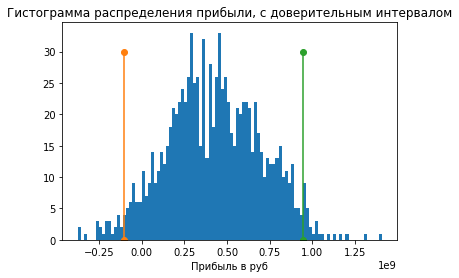

In [35]:
check=df0_predictions

target=check['product']#факт значения
probabilities=check['predictions']# предсказания
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    # < напишите код здесь>
  
    target_subsample = target.sample(n=500, replace=True, random_state=state)# взяли случайно 500 строк факт значения
    probs_subsample = probabilities[target_subsample.index] # из этих же строк взяли предсказания
    value=revenue(target_subsample,probs_subsample, 200) # функция которая считает выручку из 200 значений
    values.append(value)
    # Мы взяли отсортировали target на основании вероятностей и проссумировали 1-ые 200 шт и *450000
values_profit_df0 = pd.Series(values) # Трансформирование
values=pd.Series(values)
mean = values.mean()
#print(values.unique())   
lower = values.quantile(0.025) 
higher = values.quantile(0.975)

#profit=values.sum()
profit=values.sum()+10**10
profit_val0=values.sum()
print("выручка:        ", profit)
print("Валовая прибыль:", profit_val0)
print("Средняя выручка:", mean)
print("2,5%-квантиль:", lower) 
print("97,5%-квантиль:", higher) 
print("95% Доверительный интервал",st.t.interval(
    0.95, len(values)-1, values.mean(),values.sem()) )

print("Распределение прибыли с границами доверительного интервала")

# левая граница доверительного интервала
x1, y1 = [lower, lower], [0, 30]
    # правая граница доверительного интервала
x2, y2 = [higher,higher], [0, 30]
plt.figure()
x = plt.hist(values,  bins=100)
plt.plot(x1, y1, x2, y2 ,marker = 'o')
plt.title("Гистограмма распределения прибыли, с доверительным интервалом")
plt.xlabel('Прибыль в руб')
plt.show()



### Для 1 региона

выручка:         525222773443.28986
Валовая прибыль: 515222773443.28986
Средняя выручка: 515222773.4432899
2,5%-квантиль: 68873225.37050176
97,5%-квантиль: 931547591.2570494
95% Доверительный интервал (501621476.17632174, 528824070.710258)
Распределение прибыли с границами доверительного интервала


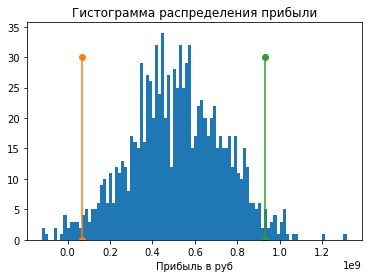

In [36]:
check=df1_predictions

target=check['product']#факт значения
probabilities=check['predictions']# предсказания
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    # < напишите код здесь>
  
    target_subsample = target.sample(n=500, replace=True, random_state=state)# взяли случайно 500 строк факт значения
    probs_subsample = probabilities[target_subsample.index] # из этих же строк взяли предсказания
    value=revenue(target_subsample,probs_subsample, 200) # функция которая считает выручку из 200 значений
    values.append(value)
    # Мы взяли отсортировали target на основании вероятностей и проссумировали 1-ые 200 шт и *450000
values_profit_df1 = pd.Series(values) # Трансформирование
values=pd.Series(values)
mean = values.mean()
#print(values.unique())   
lower = values.quantile(0.025) 
higher = values.quantile(0.975)

#profit=values.sum()
profit=values.sum()+10**10
profit_val1=values.sum()
print("выручка:        ", profit)
print("Валовая прибыль:", profit_val1)
print("Средняя выручка:", mean)
print("2,5%-квантиль:", lower) 
print("97,5%-квантиль:", higher) 
print("95% Доверительный интервал",st.t.interval(
    0.95, len(values)-1, values.mean(),values.sem()) )

print("Распределение прибыли с границами доверительного интервала")

# левая граница доверительного интервала
x1, y1 = [lower, lower], [0, 30]
    # правая граница доверительного интервала
x2, y2 = [higher,higher], [0, 30]
plt.figure()
x = plt.hist(values,  bins=100)
plt.plot(x1, y1, x2, y2 ,marker = 'o')
plt.title("Гистограмма распределения прибыли")
plt.xlabel('Прибыль в руб')
plt.show()

### Для 2 региона

выручка:         445008362782.7556
Валовая прибыль: 435008362782.7556
Средняя выручка: 435008362.7827556
2,55%-квантиль: -128880547.32978901
97,5%-квантиль: 969706954.1802661
95% Доверительный интервал (417453552.0413578, 452563173.5241534)
Распределение прибыли с границами доверительного интервала


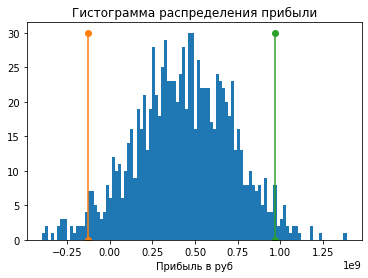

In [37]:
check=df2_predictions

target=check['product']#факт значения
probabilities=check['predictions']# предсказания
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    # < напишите код здесь>
  
    target_subsample = target.sample(n=500, replace=True, random_state=state)# взяли случайно 500 строк факт значения
    probs_subsample = probabilities[target_subsample.index] # из этих же строк взяли предсказания
    value=revenue(target_subsample,probs_subsample, 200) # функция которая считает выручку из 200 значений
    values.append(value)
    # Мы взяли отсортировали target на основании вероятностей и проссумировали 1-ые 200 шт и *450000
values_profit_df2 = pd.Series(values) # Трансформирование
values=pd.Series(values)
mean = values.mean()
#print(values.unique())   
lower = values.quantile(0.025) 
higher = values.quantile(0.975)

#profit=values.sum()
profit=values.sum()+10**10
profit_val2=values.sum()
print("выручка:        ", profit)
print("Валовая прибыль:", profit_val2)
print("Средняя выручка:", mean)
print("2,55%-квантиль:", lower) 
print("97,5%-квантиль:", higher) 
print("95% Доверительный интервал",st.t.interval(
    0.95, len(values)-1, values.mean(),values.sem()) )

print("Распределение прибыли с границами доверительного интервала")

# левая граница доверительного интервала
x1, y1 = [lower, lower], [0, 30]
    # правая граница доверительного интервала
x2, y2 = [higher,higher], [0, 30]
plt.figure()
x = plt.hist(values,  bins=100)
plt.plot(x1, y1, x2, y2 ,marker = 'o')
plt.title("Гистограмма распределения прибыли")
plt.xlabel('Прибыль в руб')
plt.show()

Вероятность убытков=6.40% и является меньше допустимой
выручка:         445008362782.7556
Валовая прибыль: 435008362782.7556
Средняя прибыль: 435008362.7827556 руб
2,55%-квантиль: -128880547.32978901
97,5%-квантиль: 969706954.1802661
95% Доверительный интервал (417453552.0413578, 452563173.5241534)


Text(0.5, 0, 'Прибыль в руб')

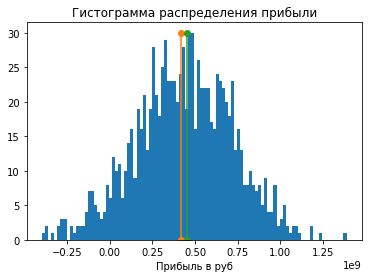

In [38]:
check=df2_predictions
count=0
target=check['product']#факт значения
probabilities=check['predictions']# предсказания
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    # < напишите код здесь>
  
    target_subsample = target.sample(n=500, replace=True, random_state=state)# взяли случайно 500 строк факт значения
    probs_subsample = probabilities[target_subsample.index] # из этих же строк взяли предсказания
    value=revenue(target_subsample,probs_subsample, 200) # функция которая считает выручку из 200 значений
    if value<0:
        count+=1
    
    values.append(value)
    # Мы взяли отсортировали target на основании вероятностей и проссумировали 1-ые 200 шт и *450000
values_profit_df2 = pd.Series(values) # Трансформирование
values=pd.Series(values)
mean = values.mean()
#print(values.unique())   
lower = values.quantile(0.025) 
higher = values.quantile(0.975)

#profit=values.sum()
profit=values.sum()+10**10
profit_val2=values.sum()

confidence_interval=st.t.interval(
    0.95, len(values)-1, values.mean(),values.sem())
pvalue=count/1000
if pvalue<2.5:
    print(f'Вероятность убытков={pvalue:.2%} и является меньше допустимой')
else:
    print(f'Вероятность убытков={pvalue:.2%} и является БОЛЬШЕ допустимой')      
print("выручка:        ", profit)
print("Валовая прибыль:", profit_val2)
print("Средняя прибыль:", mean,'руб')
print("2,55%-квантиль:", lower) 
print("97,5%-квантиль:", higher) 
print("95% Доверительный интервал",st.t.interval(
    0.95, len(values)-1, values.mean(),values.sem()) )

# левая граница доверительного интервала
x1, y1 = [confidence_interval[0], confidence_interval[0]], [0, 30]
    # правая граница доверительного интервала
x2, y2 = [confidence_interval[1],confidence_interval[1]], [0, 30]
plt.figure()
x = plt.hist(values,  bins=100)
plt.plot(x1, y1, x2, y2 ,marker = 'o')
plt.title("Гистограмма распределения прибыли")
plt.xlabel('Прибыль в руб')

### Распределение прибыли/убытков в различных регионах

<AxesSubplot:>

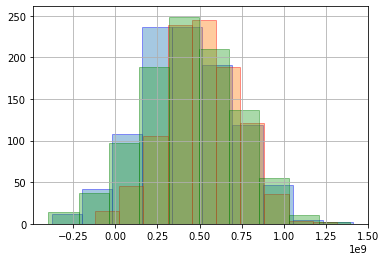

In [39]:
values_profit_df0.hist(alpha=0.4,edgecolor='blue')
values_profit_df1.hist(alpha=0.4,edgecolor='red')
values_profit_df2.hist(alpha=0.4,edgecolor='green')

Регион 0

<AxesSubplot:>

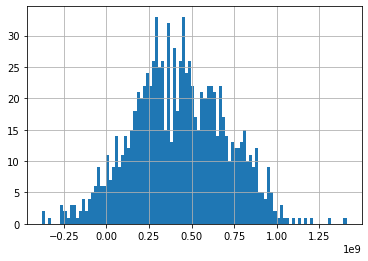

In [40]:
values_profit_df0.hist( bins=100)



Регион 1

<AxesSubplot:>

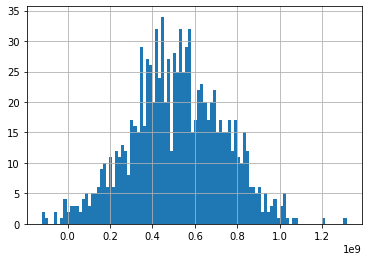

In [41]:
values_profit_df1.hist(bins=100)

Регион 2

<AxesSubplot:>

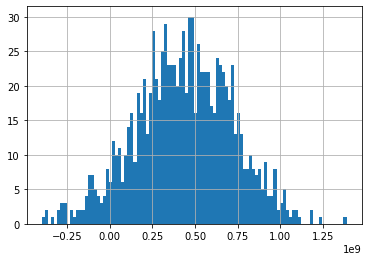

In [42]:
values_profit_df2.hist(bins=100)

### Доходы 

In [43]:
dictOne = {"Валовая прибыль для 0 Региона, милиард руб":[profit_val0/(10**10)],
		   "Валовая прибыль для 1 Региона милиард руб":[profit_val1/(10**10)],
		   "Валовая прибыль для 2 Региона милиард руб":[profit_val2/(10**10)]}
dictOne





{'Валовая прибыль для 0 Региона, милиард руб': [42.59385269105924],
 'Валовая прибыль для 1 Региона милиард руб': [51.522277344328984],
 'Валовая прибыль для 2 Региона милиард руб': [43.500836278275564]}

### Риск убыток

In [44]:
def calculation_profit(values):
    summ=0
    for i in range(0,len(values)):
        value=values[i]
        if value<0:
            summ+=1

    return summ/len(values)*100 

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Риски можно было бы считать лаконичнее: `(values < 0).mean() `
</div>

In [45]:
losses_percentage_df0=calculation_profit(values_profit_df0)
losses_percentage_df1=calculation_profit(values_profit_df1)
losses_percentage_df2=calculation_profit(values_profit_df2)


In [46]:
dictOne = {"Риски для 0 Региона":[losses_percentage_df0],
		   "Риски для 1 Региона":[losses_percentage_df1],
		   "Риски для 2 Региона":[losses_percentage_df2]}
dictOne

{'Риски для 0 Региона': [6.0],
 'Риски для 1 Региона': [1.0],
 'Риски для 2 Региона': [6.4]}

# Заключение самый оптимальный вариант для добычи нефти это регион 1, по следующим причинам

1) Минимальные риски 1%

2) мах Валовая прибыль 51 милиард рублей

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован